## 讀入影像

In [1]:
import numpy as np
import cv2
# Load an color image in grayscale
img = cv2.imread('/Users/shin/Desktop/222.jpg',cv2.IMREAD_COLOR)
#cv2.IMREAD_COLOR 讀入彩色
#cv2.IMREAD_GRAYSCALE 讀入灰階模式

### 讀出影像

In [ ]:
cv2.imshow('image',img)#開一個GUI顯示照片
cv2.waitKey(0)#返回ASCII
cv2.destroyAllWindows()#可以刪除我們建立的窗口

In [2]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)#先做一個可以調整大小的框 再把圖放進去 可以調整顯示大小
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 儲存影像

In [5]:
cv2.imwrite('/Users/shin/Desktop/messigray.png',img)

True

### 總結 -- 當按下ESC離開, 按下 's' 儲存

In [ ]:
import numpy as np
import cv2

img = cv2.imread("/Users/shin/Desktop/222.jpg",0)
cv2.imshow("image",img)
k = cv2.waitKey(0)
if k == 27:#ESC的ＡＳＣＩＩ為27
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite("/Users/shin/Desktop/messigray.png",img)
    cv2.destroyAllWindows()

### Matplotlib

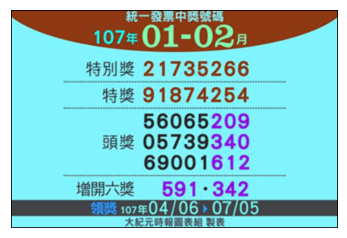

In [3]:
# OPENCV是BGR Matplotlib是RGB
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/shin/Desktop/222.jpg')
plt.imshow(img, cmap = 'hot', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

### 視頻

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20000.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frame = cv2.flip(frame,0)#翻轉一次然後保存寫入
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

#### OpenCV 繪圖

(1, 4, 2)


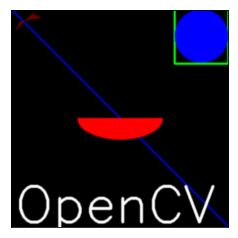

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#畫匡
# Create a black image
img = np.zeros((512,512,3),np.uint8)
# Draw a diagonal blue line with thickness of 5 px
#cv2.polylines()可以畫多條線
img = cv2.line(img,(0,0),(511,511),(0,0,255),2)
#               圖,  起始 , 終點     ,線的顏色  ,線粗 
#畫矩形 所有繪圖函數返回值都None 不能給別人接
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
#                  左上頂點,右下頂點
#畫圓形
cv2.circle(img,(447,63), 63, (0,0,255), -1)
#               圓心 ,   半徑, 顏色     , 填滿
#畫橢圓
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
#                中心點座標,長.短軸長,軸角度,畫圓起末角度,

pts=np.array([[10,50],[20,30],[70,20],[50,10]], np.int32)
pts=pts.reshape((-1,4,2))
cv2.fillPoly(img,pts,100)
print(pts.shape)

#添加文字
font=cv2.FONT_HERSHEY_SIMPLEX
#font=cv2.LINE_AA 
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),5)

#show in GUI
#winname = 'example'
#cv2.namedWindow(winname)
#cv2.imshow(winname,img)
#cv2.waitKey(0)
#cv2.destroyWindow(winname)

#show in plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])#影藏X,Y軸
   #to hide tick values on X and Y axis
plt.show()

(1, 4, 2)


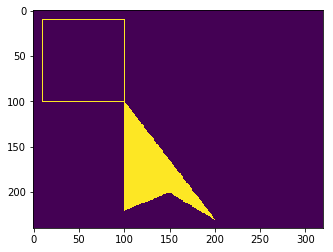

In [21]:
#畫多邊形
import numpy as np
import cv2
import matplotlib.pyplot as plt
a = np.array([[[10,10], [100,10], [100,100], [10,100]]], dtype = np.int32)
b = np.array([[[100,100], [200,230], [150,200], [100,220]]], dtype = np.int32)
print(a.shape)
im = np.zeros([240, 320], dtype = np.uint8)
cv2.polylines(im, a, 1, 255)
cv2.fillPoly(im, b, 255)
plt.imshow(im)
plt.show()

### 滑鼠當畫筆

In [27]:
import cv2
events=[i for i in dir(cv2) if 'EVENT'in i] 
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [3]:
#滑鼠點左鍵跑出一個圓
import cv2
import numpy as np #mouse callback function
def draw_circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(0,255,0),-1)
# 创建图像与窗口并将窗口与回调函数绑定 
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1): 
    cv2.imshow('image',img)
    if cv2.waitKey(20)&0xFF==27:
        break
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
# 当鼠标按下时变为 True
drawing=False
# 如果 mode 为 true 绘制矩形。按下'm' 变成绘制曲线。 
mode=True
ix,iy=-1,-1
# 创建回调函数
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode #global為把變數再塞回到全世界去
#当按下左键是返回起始位置坐标
    if event==cv2.EVENT_LBUTTONDOWN: 
        drawing=True
        ix,iy=x,y
#当鼠标左键按下并移动是绘制图形。event 可以查看移动，flag 查看是否按下
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON: 
        if drawing==True:
            if mode==True: 
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                # 绘制圆圈，小圆点连在一起就成了线，3 代表了笔画的粗细 
                cv2.circle(img,(x,y),3,(0,0,255),-1)
                # 下面注释掉的代码是起始点为圆心，起点到终点为半径的
                r=int(np.sqrt((x-ix)**2+(y-iy)**2))
                cv2.circle(img,(x,y),r,(0,0,255),-1)
#当鼠标松开停止绘画。
    elif event==cv2.EVENT_LBUTTONUP:
        drawing==False
#       if mode==True:
#           cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
#       else:
#           cv2.circle(img,(x,y),5,(0,0,255),-1)

img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img) 
    #waitKey(20)延遲20毫秒顯示，期間如果按下任何一鍵會顯示出ASCll
    k=cv2.waitKey(20)&0xFF #(&0xFF--64位元才需要加)
    if k==ord('m'):#如果按下m則切換到曲線模式
        mode=not mode 
        print(k)
    elif k==27:
        break

109
109


#### 調色

In [1]:
import cv2
import numpy as np
def nothing(x): 
    pass
# 创建一副黑色图像 
img=np.zeros((300,512,3),np.uint8) 
cv2.namedWindow('image')
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
switch='0:OFF\n1:ON'
cv2.createTrackbar(switch,'image',0,1,nothing)
while(1): 
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF 
    if k==27:
        break
    r=cv2.getTrackbarPos('R','image')
                        #條名,窗口名
    g=cv2.getTrackbarPos('G','image')
    b=cv2.getTrackbarPos('B','image')
    s=cv2.getTrackbarPos(switch,'image')
    if s==0:
        img[:]=0
    else:
        img[:]=[b,g,r]
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
def nothing(x):
    pass
# 当鼠标按下时变为 True
drawing=False
# 如果 mode 为 true 绘制矩形。按下'm' 变成绘制曲线。
mode=True
ix,iy=-1,-1
# 创建回调函数
def draw_circle(event,x,y,flags,param):
    r=cv2.getTrackbarPos('R','image') 
    g=cv2.getTrackbarPos('G','image') 
    b=cv2.getTrackbarPos('B','image') 
    color=(b,g,r)

    global ix,iy,drawing,mode 
    #当按下左键是返回起始位置坐标
    if event==cv2.EVENT_LBUTTONDOWN: 
        drawing=True
        ix,iy=x,y
    #当鼠标左键按下并移动是绘制图形。event 可以查看移动，flag 查看是否按下
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        if drawing==True:
            if mode==True:
                cv2.rectangle(img,(ix,iy),(x,y),color,-1)
            else:
                # 绘制圆圈，小圆点连在一起就成了线，3 代表了笔画的粗细
                cv2.circle(img,(x,y),3,color,-1)
                # 下面注释掉的代码是起始点为圆心，起点到终点为半径的
#               r=int(np.sqrt((x-ix)**2+(y-iy)**2))
#               cv2.circle(img,(x,y),r,(0,0,255),-1)
        #当鼠标松开停止绘画。
        elif event==cv2.EVENT_LBUTTONUP: 
            drawing==False
#                if mode==True: 
#                    cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
#                else: 
#                    cv2.circle(img,(x,y),5,(0,0,255),-1)
img=np.zeros((512,512,3),np.uint8) 
cv2.namedWindow('image')
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing) 
cv2.createTrackbar('B','image',0,255,nothing)
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF 
    if k==ord('m'):
        mode=not mode
    elif k==27:
        break